In [1]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns

In [2]:

import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
pip install wordcloud

In [4]:
from wordcloud import WordCloud

In [5]:
column_names = ['target','ids','date','flag','user','text']
df=pd.DataFrame(pd.read_csv("./files/twitter.csv",names=column_names,encoding="ISO-8859-1"))

In [6]:
df.sample(3)



,target,ids,date,flag,user,text
976853,4,1833677410,Mon May 18 00:04:34 PDT 2009,NO_QUERY,BexBetch,@GuySebastian Thanks for the follow first cel...
857002,4,1573856224,Tue Apr 21 03:10:47 PDT 2009,NO_QUERY,natashenka007,@laurentchambon More than we can say about the...
380085,0,2052487605,Sat Jun 06 00:54:04 PDT 2009,NO_QUERY,courgamm,Once again... @allstarrocks are geniuses 4 com...


In [7]:
print("length of the dataset",len(df))

length of the dataset 1600000


In [8]:
df.shape

(1600000, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [10]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1600000


In [11]:
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [12]:

df['target'].unique()

array([0, 4], dtype=int64)

In [13]:

df['target'].nunique()

2

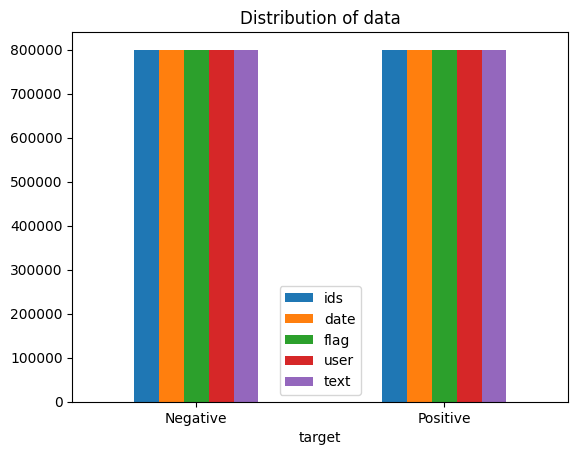

In [14]:
ax=df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=True)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

<Axes: xlabel='target', ylabel='count'>

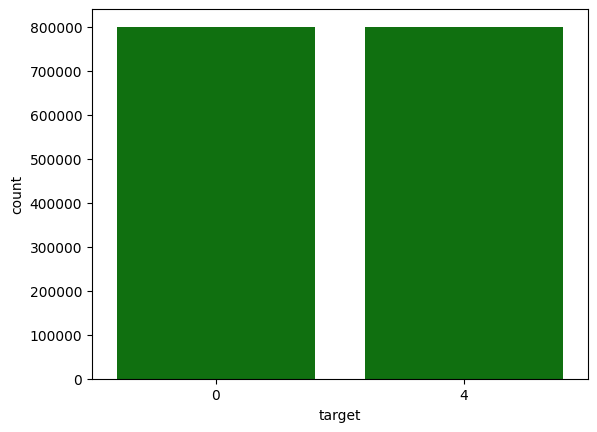

In [15]:
sns.countplot(x='target',data=df,color='green')

In [16]:
data=df[['text','target']]

In [17]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

The code you provided uses the iloc indexer to select rows by integer location. Specifically, it selects all rows up to the index position 20,000 (exclusive) from each DataFrame.

In [18]:

data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [19]:
dataset = pd.concat([data_pos, data_neg])

In [20]:
dataset.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [21]:
dataset.shape

(20000, 2)

In [22]:

dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()


19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

In [23]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [24]:
STOPWORDS = set(stopwordlist)
def clean_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

**Here are we removing stopwords from the text column and we already specified stop words**

In [25]:
dataset['text'] = dataset['text'].apply(lambda text: clean_stopwords(text))
dataset['text'].head()


0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    upset can't update facebook texting it... migh...
2    @kenichan dived many times ball. managed save ...
3                     whole body feels itchy like fire
4    @nationwideclass no, it's not behaving all. i'...
Name: text, dtype: object

In [26]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations

**Here we are removing punctuations marks from the text to clean the tex**

In [27]:
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [28]:
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()


19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [29]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [30]:
def remove_url(x):
    pattern=re.compile(r"(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?")
    return pattern.sub("",x)

In [31]:
dataset['text'] = dataset['text'].apply(lambda x: remove_url(x))
dataset['text'].sample()

13798    microwaves really fucking confusing
Name: text, dtype: object

In [32]:
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].sample()

1725    time get ass gear start day
Name: text, dtype: object

In [33]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()


19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [34]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

0    [w, w, www]
1             []
2             []
3            [w]
4            [w]
Name: text, dtype: object

In [35]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

0    [w, w, www]
1             []
2             []
3            [w]
4            [w]
Name: text, dtype: object

In [36]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

0    [w, w, www]
1             []
2             []
3            [w]
4            [w]
Name: text, dtype: object

In [37]:
X=data['text']
y=data['target']

In [38]:
data.dtypes

text      object
target     int64
dtype: object

In [39]:
data.sample()

,text,target
386634,it's an absolutely gorgeous day out there. I w...,0


this code creates a word cloud visualization from the first 800,000 entries of text data, displaying the most frequent negative words in the dataset. The word cloud is displayed in a 20x20 inch plot.

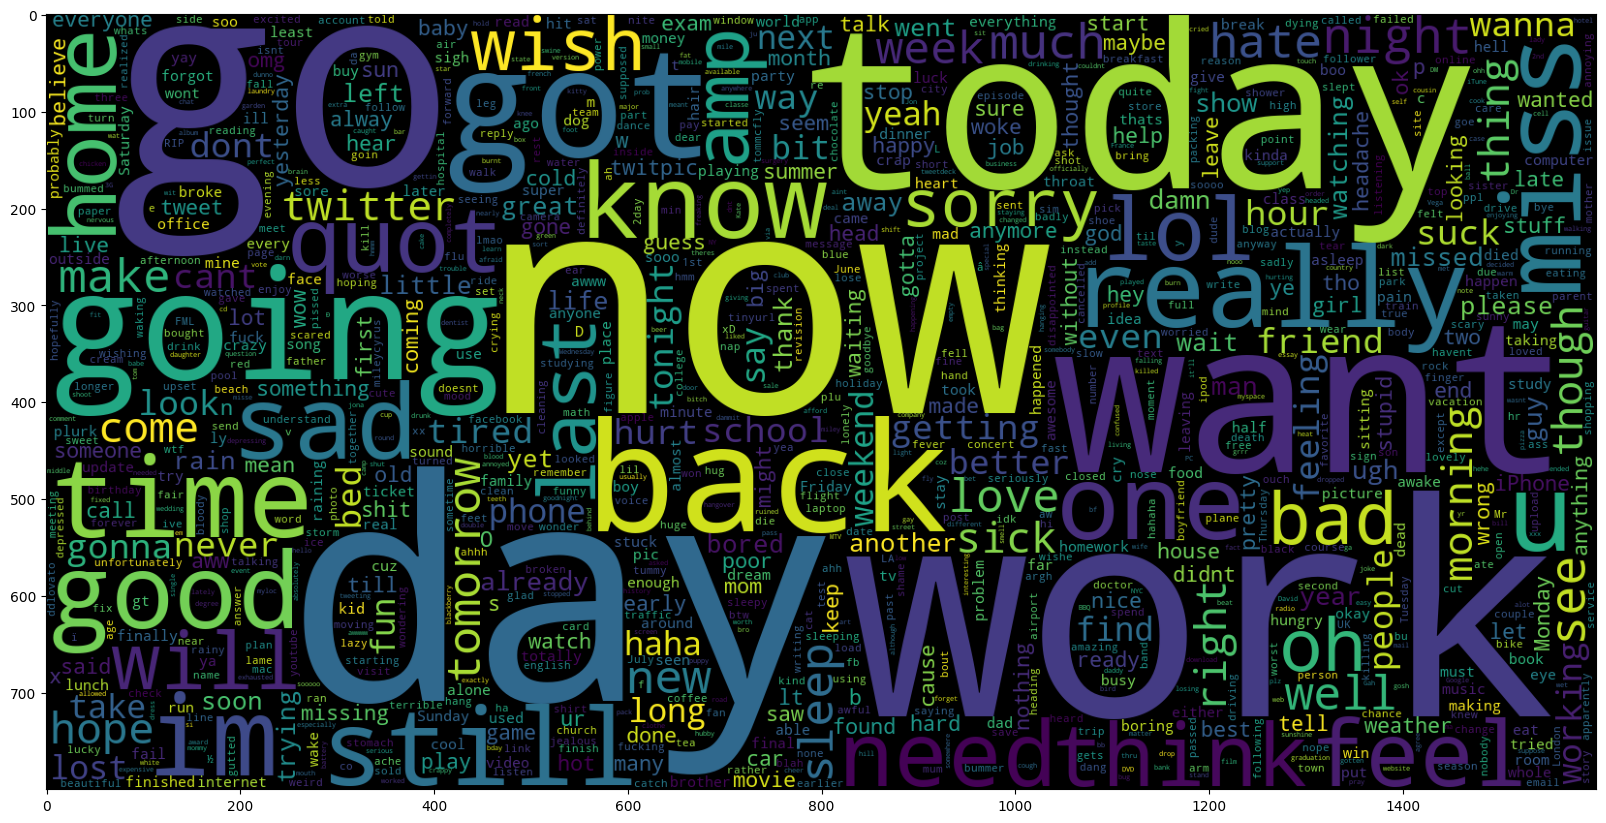

In [40]:

data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)


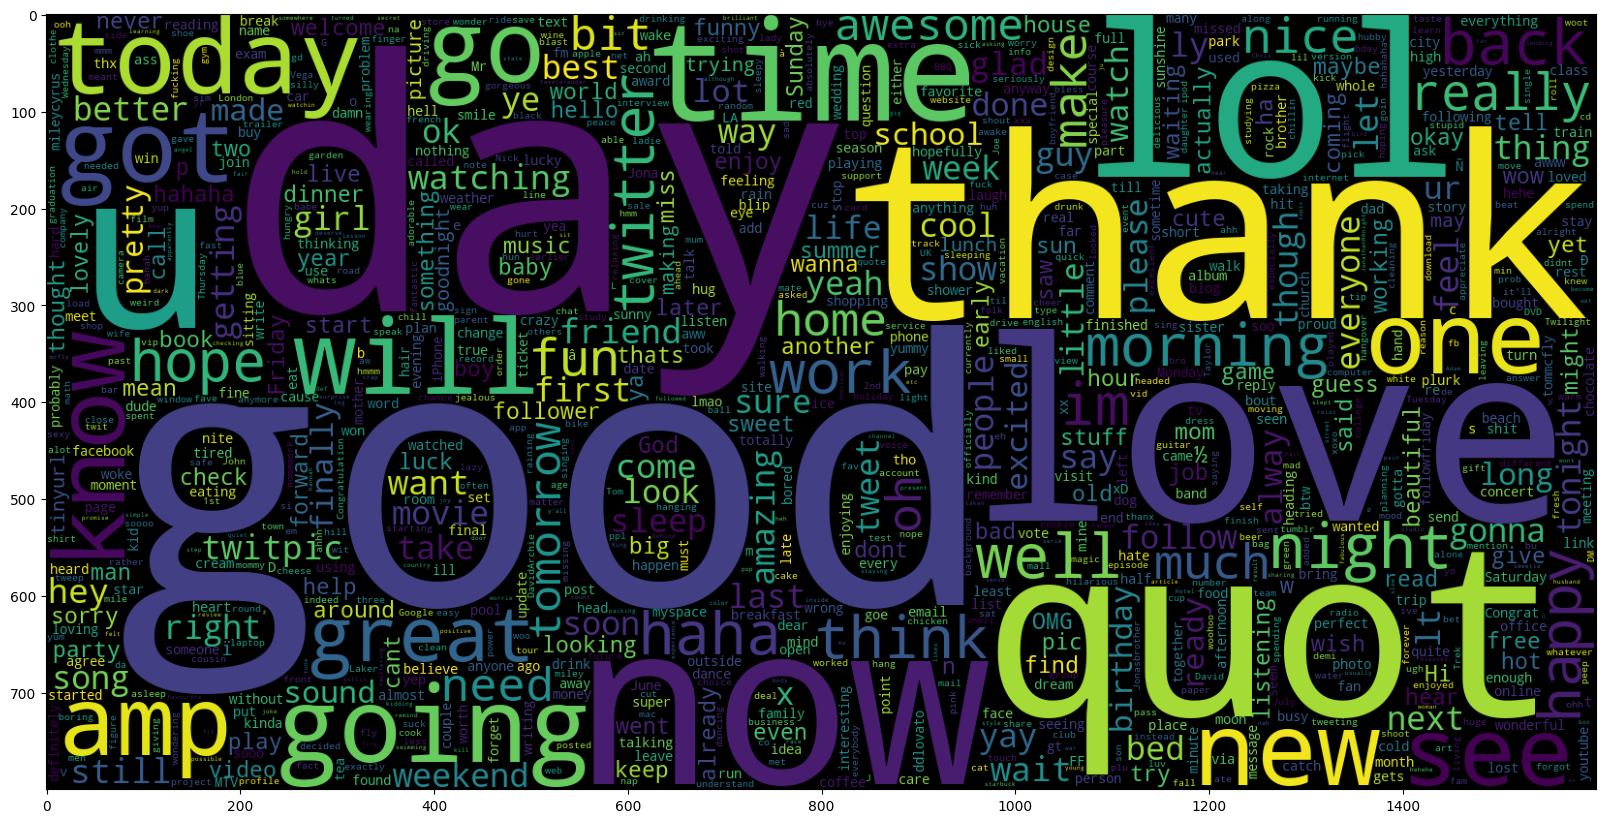

In [41]:
data_pos = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

**I have split the dataset into 80% into training and 20% into testing**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42)

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000): This line initializes a TF-IDF vectorizer object named vectoriser with the following parameters:

ngram_range=(1,2): Specifies that both unigrams (single words) and bigrams (pairs of adjacent words) should be considered as features.
this code sets up a TF-IDF vectorizer with specified parameters, fits it to the training data, and prints the number of unique feature words extracted from the training data. These feature words will be used as input features for machine learning models.

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [44]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
X_train_transformed = vectorizer.fit_transform(X_train)
print('No. of feature_words:', len(vectorizer.get_feature_names_out()))

No. of feature_words: 500000


In [45]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels,lemmatizer_on_text = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


In [46]:
def model_Evaluate(model, X_test, y_test):
    X_test_transformed = vectorizer.transform(X_test)

# Predict on the transformed test data
    y_pred = model.predict(X_test_transformed)

# Evaluate the model
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    
    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='', xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)
    plt.show()


              precision    recall  f1-score   support

           0       0.80      0.79      0.80    159494
           4       0.80      0.81      0.80    160506

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



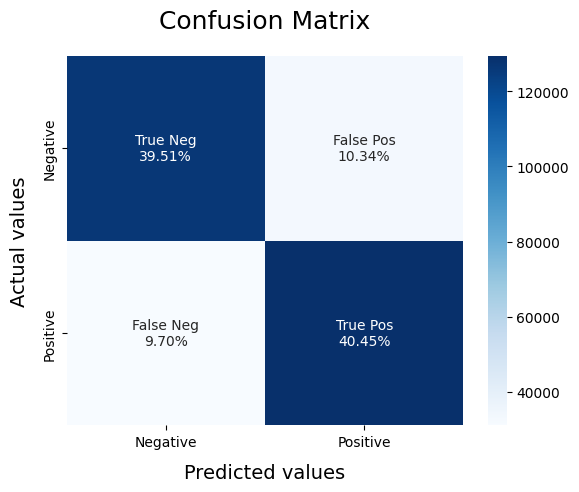

In [47]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train_transformed, y_train)
model_Evaluate(BNBmodel,X_test, y_test)
X_test_transformed = vectorizer.transform(X_test)
y_pred1 = BNBmodel.predict(X_test_transformed)

In [48]:
from sklearn.metrics import roc_curve, auc


In [49]:
y_test.unique()

array([0, 4], dtype=int64)

In [50]:
y_pred1

array([4, 4, 4, ..., 4, 0, 0], dtype=int64)

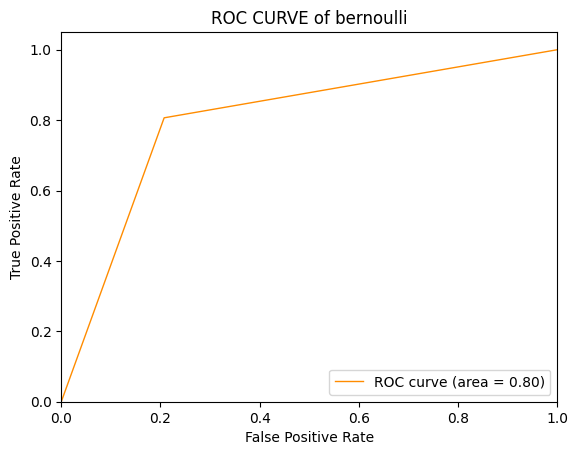

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1,pos_label=4)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE of bernoulli')
plt.legend(loc="lower right")
plt.show()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.82      0.81      0.81    159494
           4       0.81      0.82      0.82    160506

    accuracy                           0.81    320000
   macro avg       0.81      0.81      0.81    320000
weighted avg       0.81      0.81      0.81    320000



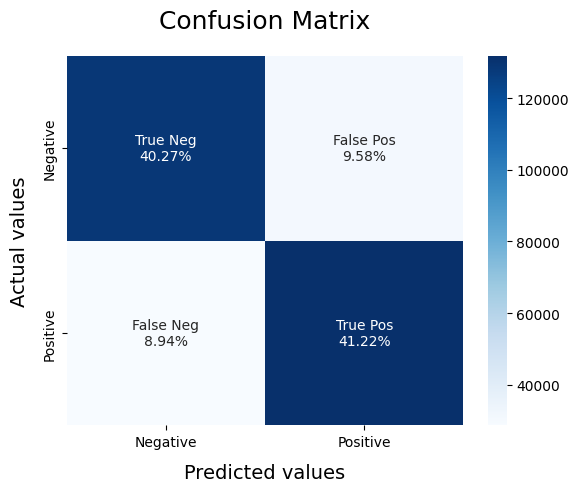

In [52]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_transformed, y_train)
model_Evaluate(SVCmodel,X_test,y_test)
X_test_transformed1 = vectorizer.transform(X_test)
y_pred2 = SVCmodel.predict(X_test_transformed1)

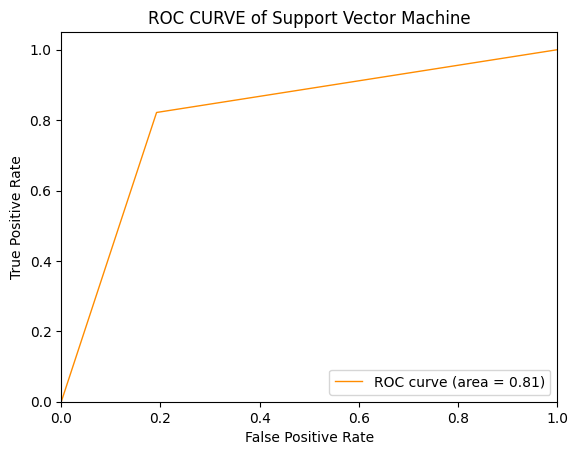

In [53]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2,pos_label=4)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE of Support Vector Machine')
plt.legend(loc="lower right")
plt.show()


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.83      0.81      0.82    159494
           4       0.82      0.83      0.82    160506

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000



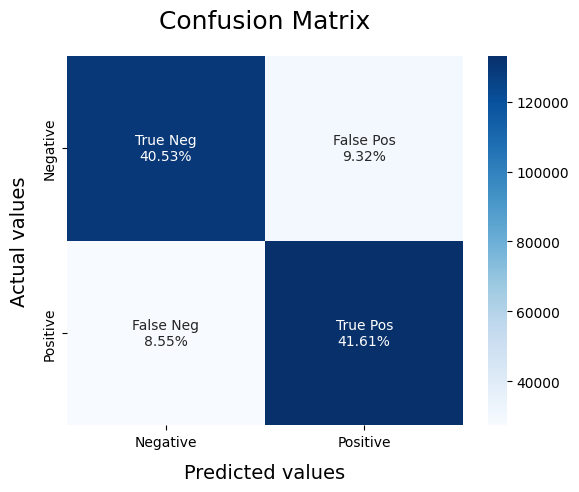

In [54]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train_transformed, y_train)
model_Evaluate(LRmodel,X_test,y_test)
X_test_transformed2 = vectorizer.transform(X_test)
y_pred3 = LRmodel.predict(X_test_transformed2)

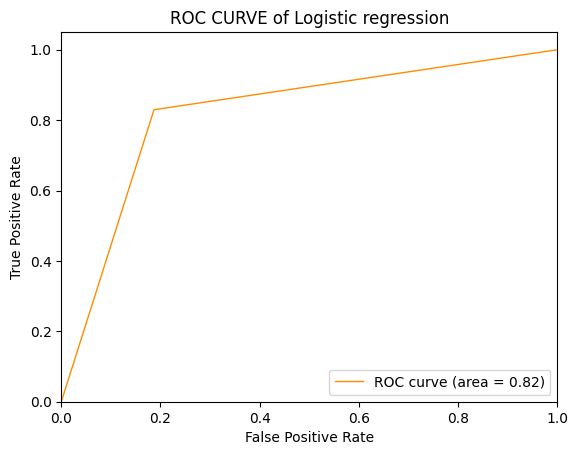

In [55]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3,pos_label=4)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE of Logistic regression')
plt.legend(loc="lower right")
plt.show()


**CONCLUSION:** 
*Utilizing TF-IDF Vectorizer and NLTK libraries for data preprocessing, we applied three classification algorithms - Bernoulli Naive Bayes, Support Vector Machine (SVM), and Logistic Regression - for sentiment analysis of tweets.*

**Results:**

- *Bernoulli Naive Bayes: Accuracy 80%, F1-score 0.80.*
- *Support Vector Machine (SVM): Accuracy 81%, F1-score 0.81.*
- *Logistic Regression: Accuracy 82%, F1-score 0.82.*
*Logistic Regression and SVM outperformed Bernoulli Naive Bayes in tweet classification. Logistic Regression achieved the highest accuracy and F1-score, demonstrating its effectiveness. Data was split into an 80:20 ratio for training and testing, ensuring model validation and assessment of generalization capability.*

*In summary, the project successfully employed machine learning techniques for sentiment analysis, highlighting the significance of preprocessing and algorithm selection in accurate tweet categorization.*